In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import Lasso
import pickle
from sklearn import ensemble
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

# SVD Reconstruction: Training Data

In [47]:
utrain = pd.read_csv('utrain.dat', sep = ",",header =None)
vtrain = pd.read_csv('vtrain.dat', sep = ",",header =None)
sgmatrain = pd.read_csv('sgmatrain.dat', sep = ",",header =None)

In [48]:
utest = pd.read_csv('utest.dat', sep = ",",header =None)
vtest = pd.read_csv('vtest.dat', sep = ",",header =None)
sgmatest = pd.read_csv('sgmatest.dat', sep = ",",header =None)

In [49]:
features = pd.read_csv('features23.dat', sep = ",",header =None)
weights = pd.read_csv('weights.dat', sep = ",",header =None)

In [50]:
ticktrain = np.dot(np.dot(utrain,sgmatrain),vtrain.T)
ticktest = np.dot(np.dot(utest,sgmatest),vtest.T)

In [51]:
reconst = np.concatenate((features, np.r_[ticktrain,ticktest],weights),axis=1)
colnames = 'Feature_1	Feature_2	Feature_3	Feature_4	Feature_5	Feature_6	Feature_7	Feature_8	Feature_9	Feature_10	Feature_11	Feature_12	Feature_13	Feature_14	Feature_15	Feature_16	Feature_17	Feature_18	Feature_19	Feature_20	Feature_21	Feature_22	Feature_23	Feature_24	Feature_25	Ret_MinusTwo	Ret_MinusOne	Ret_2	Ret_3	Ret_4	Ret_5	Ret_6	Ret_7	Ret_8	Ret_9	Ret_10	Ret_11	Ret_12	Ret_13	Ret_14	Ret_15	Ret_16	Ret_17	Ret_18	Ret_19	Ret_20	Ret_21	Ret_22	Ret_23	Ret_24	Ret_25	Ret_26	Ret_27	Ret_28	Ret_29	Ret_30	Ret_31	Ret_32	Ret_33	Ret_34	Ret_35	Ret_36	Ret_37	Ret_38	Ret_39	Ret_40	Ret_41	Ret_42	Ret_43	Ret_44	Ret_45	Ret_46	Ret_47	Ret_48	Ret_49	Ret_50	Ret_51	Ret_52	Ret_53	Ret_54	Ret_55	Ret_56	Ret_57	Ret_58	Ret_59	Ret_60	Ret_61	Ret_62	Ret_63	Ret_64	Ret_65	Ret_66	Ret_67	Ret_68	Ret_69	Ret_70	Ret_71	Ret_72	Ret_73	Ret_74	Ret_75	Ret_76	Ret_77	Ret_78	Ret_79	Ret_80	Ret_81	Ret_82	Ret_83	Ret_84	Ret_85	Ret_86	Ret_87	Ret_88	Ret_89	Ret_90	Ret_91	Ret_92	Ret_93	Ret_94	Ret_95	Ret_96	Ret_97	Ret_98	Ret_99	Ret_100	Ret_101	Ret_102	Ret_103	Ret_104	Ret_105	Ret_106	Ret_107	Ret_108	Ret_109	Ret_110	Ret_111	Ret_112	Ret_113	Ret_114	Ret_115	Ret_116	Ret_117	Ret_118	Ret_119	Ret_120	Ret_121	Ret_122	Ret_123	Ret_124	Ret_125	Ret_126	Ret_127	Ret_128	Ret_129	Ret_130	Ret_131	Ret_132	Ret_133	Ret_134	Ret_135	Ret_136	Ret_137	Ret_138	Ret_139	Ret_140	Ret_141	Ret_142	Ret_143	Ret_144	Ret_145	Ret_146	Ret_147	Ret_148	Ret_149	Ret_150	Ret_151	Ret_152	Ret_153	Ret_154	Ret_155	Ret_156	Ret_157	Ret_158	Ret_159	Ret_160	Ret_161	Ret_162	Ret_163	Ret_164	Ret_165	Ret_166	Ret_167	Ret_168	Ret_169	Ret_170	Ret_171	Ret_172	Ret_173	Ret_174	Ret_175	Ret_176	Ret_177	Ret_178	Ret_179	Ret_180	Ret_PlusOne	Ret_PlusTwo	Weight_Intraday	Weight_Daily'
colnames = colnames.split()
del(colnames[0])
del(colnames[14])
df = pd.DataFrame(reconst,columns=colnames)

In [52]:
df

,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,...,Ret_175,Ret_176,Ret_177,Ret_178,Ret_179,Ret_180,Ret_PlusOne,Ret_PlusTwo,Weight_Intraday,Weight_Daily
0,-10.522000,38.51000,8.821600,8.0,-13.407000,75751.0,0.2254,11.0,5.0000,1.732900,...,-0.000156,0.000741,-0.000122,-2.752951e-04,-0.000051,-0.000841,-0.019479,0.028858,1251500.0,1564400.0
1,-3.415400,9.86010,1.785700,3.0,0.388900,17369.0,0.0166,13.0,5.0000,-0.409920,...,-0.000097,0.000092,0.000320,1.839919e-04,0.000117,0.000159,-0.002939,-0.010256,1734000.0,2167400.0
2,-0.696730,0.73959,-0.167930,9.0,0.471950,8277.0,0.3650,9.0,5.0000,-0.473020,...,0.000154,-0.000275,0.000112,6.534412e-04,0.000212,0.000761,-0.024786,0.015715,1529200.0,1911500.0
3,-0.694350,1.56820,0.479070,5.0,0.120650,22508.0,0.2654,13.0,5.0000,-2.138400,...,0.000068,-0.000010,0.000054,6.025758e-05,0.000175,0.000032,-0.005676,-0.002191,1711600.0,2139500.0
4,-1.736500,2.76550,1.245300,7.0,4.867000,22423.0,0.2138,13.0,4.0000,-4.795600,...,-0.000361,-0.000682,0.000518,1.632069e-05,0.000190,-0.000156,0.036101,-0.026547,1267300.0,1584100.0
5,-2.146800,-0.68052,0.487530,1.0,0.227030,24099.0,0.2064,8.0,4.3333,0.668210,...,0.000790,0.000533,0.001061,-2.456113e-04,0.000770,0.000447,0.031102,-0.006542,1431100.0,1788900.0
6,-0.230640,-0.22702,-0.084126,7.0,-0.095007,39351.0,0.3650,13.0,4.6667,0.614790,...,0.000094,-0.000048,0.000405,1.141014e-04,0.000184,0.000349,-0.011103,-0.030741,1719200.0,2149000.0
7,2.583000,0.15734,0.617260,8.0,-0.177330,92214.0,0.2119,8.0,5.0000,0.302680,...,-0.000229,0.000022,0.000395,-2.311784e-04,0.000225,0.000081,0.020261,-0.059086,1349900.0,1687400.0
8,-0.187950,-0.25982,0.047637,8.0,-0.381620,18418.0,0.3583,8.0,5.0000,0.580930,...,-0.000015,0.000035,-0.000226,-6.742834e-04,-0.000656,-0.000179,-0.009344,-0.024757,1536700.0,1920800.0
9,2.883600,0.81378,0.796750,7.0,0.021982,47637.0,0.2654,6.0,5.0000,-0.482580,...,0.000563,0.000171,-0.000534,1.527879e-03,-0.000138,-0.000217,0.022430,-0.010671,1370800.0,1713500.0


# Split the Training and Testing Data

In [53]:
dttrain = reconst[:30000,:]
dttest = reconst[30000:40000,:]
print dttrain.shape
print dttest.shape

(30000, 208)
(10000, 208)


# Step One: Tick Reconstruction

In [54]:
intradytr = dttrain[:,25:]
intradyts = dttest[:,25:]
print intradytr.shape
print intradyts.shape

(30000, 183)
(10000, 183)


In [55]:
yweights = dttrain[:,-4:]
intradytr = np.delete(intradytr,[179,180,181,182],1)
intradyts = np.delete(intradyts,[179,180,181,182],1)
Xtrtrue = intradytr
Xtrtemp = intradytr[:,0:119]
Xtstrue = intradyts
Xtstemp = intradyts[:,0:119]

In [56]:
print Xtrtrue.shape
print Xtrtemp.shape
print Xtstrue.shape
print Xtstemp.shape

(30000, 179)
(30000, 119)
(10000, 179)
(10000, 119)


# Data Preprocessing: Scaling

In [57]:
# normalize the dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
#Xscale = scaler.fit_transform(Xtrue)

# Training

In [67]:
from sklearn import neural_network
from sklearn import linear_model
from sklearn import tree
#model1 = ExtraTreesRegressor(n_estimators=10, max_features=32,random_state=0)
#model2 = KNeighborsRegressor()
#model3 = LinearRegression()
#model = MultiOutputRegressor(linear_model.SGDRegressor(random_state=0,loss='squared_loss',fit_intercept=False))
#model = neural_network.MLPRegressor(hidden_layer_sizes = 500, random_state=0,learning_rate='invscaling')
model1 = LinearRegression()
model2 = tree.DecisionTreeRegressor()
model3 = MultiOutputRegressor(linear_model.SGDRegressor(random_state=0,loss='squared_loss',fit_intercept=False))
modelcol1 = []
modelcol2 = []
modelcol3 = []
scalercolX = []
scalercolY = []
for i in range(1,7):
    windowX = range(0,109+i*10)
    windowY = range(109+i*10, 109+i*10+10)
    Xtrain = Xtrtrue[:,windowX]
    Ytrain = Xtrtrue[:,windowY]
    scaler.fit(Xtrain)
    Xtrain = scaler.transform(Xtrain)
    scalercolX.append(pickle.dumps(scaler))
    scaler.fit(Ytrain)
    Ytrain = scaler.transform(Ytrain)
    scalercolY.append(pickle.dumps(scaler))
    model1.fit(Xtrain, Ytrain)
    modelcol1.append(pickle.dumps(model1))
    model2.fit(Xtrain, Ytrain)
    modelcol2.append(pickle.dumps(model2))
    model3.fit(Xtrain, Ytrain)
    modelcol3.append(pickle.dumps(model3))
    #model2.fit(Xtrain, Ytrain)
    #model3.fit(Xtrain, Ytrain)
    #windowXpred = range(10, 109+i*10+10)
    #Xpred = X[:,windowXpred]
    #Ypred1 = model1.predict(Xpred)
    #Ypred2 = model2.predict(Xpred)
    #Ypred3 = model3.predict(Xpred)
    #X = np.c_[X,Ypred2]

# Testing

In [164]:
Xtest = Xtstemp
for i in range(0,6):
    #windowX = range(0,109+(i+1)*10)
    #Xtest = Xtstemp[:,windowX]
    cscalerX = pickle.loads(scalercolX[i])
    Xpred = cscalerX.transform(Xtest)
    model1 = pickle.loads(modelcol1[i])
    model2 = pickle.loads(modelcol2[i])
    model3 = pickle.loads(modelcol3[i])
    Ypred1 = model1.predict(Xpred)
    Ypred2 = model2.predict(Xpred)
    Ypred3 = model3.predict(Xpred)
    #model2.fit(Xtrain, Ytrain)
    #model3.fit(Xtrain, Ytrain)
    #windowXpred = range(10, 109+i*10+10)
    #Xpred = X[:,windowXpred]
    #Ypred1 = model1.predict(Xpred)
    #Ypred2 = model2.predict(Xpred)
    #Ypred3 = model3.predict(Xpred)
    Ypred = Ypred1*4/5 + Ypred2/10 + Ypred3/10
    cscalerY = pickle.loads(scalercolY[i])
    Yinv = cscalerY.inverse_transform(Ypred)
    Xtest = np.c_[Xtest,Yinv]

# Plot the Relative Errors

In [165]:
print np.linalg.norm(Xtest-Xtstrue,'fro')/np.linalg.norm(Xtstrue,'fro')
print np.linalg.norm(Xtstrue,'fro')

0.128828728152
0.907406615337


In [236]:
samplenum = np.random.choice(10,10)
print samplenum

[2 7 4 7 5 7 6 0 1 6]


In [246]:
xr = range(119,179)
print np.size(xr)

60


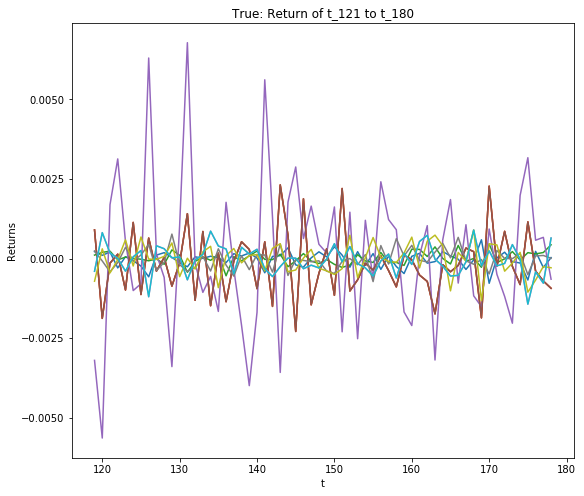

In [247]:
f, ax = plt.subplots(figsize=(9, 8))
plt.plot(xr,Xtest[samplenum,119:].T)
plt.xlabel('t')
plt.ylabel('Returns')
plt.title('True: Return of t_121 to t_180')
yticks = np.linspace(-0.005, 0.005, 5)
ax.set_yticks(yticks)

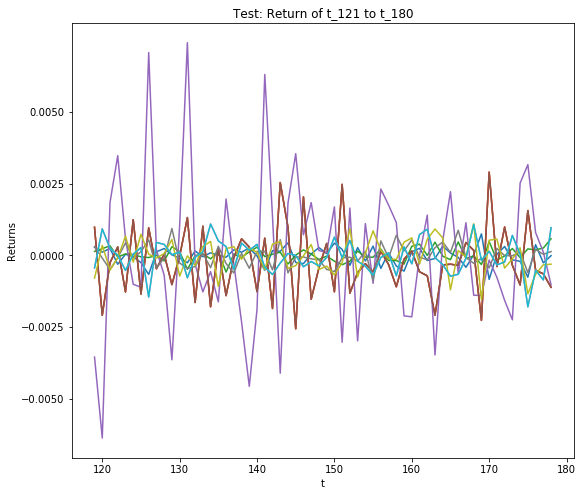

In [248]:
f, ax = plt.subplots(figsize=(9, 8))
plt.plot(xr,Xtstrue[samplenum,119:].T)
plt.xlabel('t')
plt.ylabel('Returns')
plt.title('Test: Return of t_121 to t_180')
yticks = np.linspace(-0.005, 0.005, 5)
ax.set_yticks(yticks)

# PCA to Select Necessary Features

In [166]:
featuretr = dttrain[:,:23]
featurets = dttest[:,:23]

In [167]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(featuretr)
feascale = scaler.transform(featuretr)
numcol = featuretr.shape[1]
colidx = range(numcol)
colidx = list(np.array(colidx) + 1)
for i in colidx:
    pca = PCA(n_components=i)
    pca_result = pca.fit_transform(feascale)
    print 'Num of Components %2.0f' % i, 'Variance', sum(pca.explained_variance_ratio_)* 100

Num of Components  1 Variance 28.3127968435
Num of Components  2 Variance 35.9694992101
Num of Components  3 Variance 41.7893728043
Num of Components  4 Variance 47.3950288465
Num of Components  5 Variance 51.8719791661
Num of Components  6 Variance 56.2778217854
Num of Components  7 Variance 60.5874881643
Num of Components  8 Variance 64.9682307558
Num of Components  9 Variance 69.266401079
Num of Components 10 Variance 73.4262088123
Num of Components 11 Variance 77.3796479666
Num of Components 12 Variance 80.6906037961
Num of Components 13 Variance 83.9045004737
Num of Components 14 Variance 86.8117639473
Num of Components 15 Variance 89.572710265
Num of Components 16 Variance 91.9689603501
Num of Components 17 Variance 94.1870576323
Num of Components 18 Variance 96.0384419284
Num of Components 19 Variance 97.4779490127
Num of Components 20 Variance 98.4917936142
Num of Components 21 Variance 99.0871426246
Num of Components 22 Variance 99.6154321893
Num of Components 23 Variance 100.

In [168]:
pca = PCA(n_components=18)
pca_result = pca.fit_transform(feascale)
dfpca = pd.DataFrame(pca.components_,columns=df.columns[:23], index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7',\
                                                                    'PC-8','PC-9','PC-10','PC-11','PC-12','PC-13','PC-14',\
                                                                    'PC-15','PC-16','PC-17','PC-18'])

In [169]:
dfpca

,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,...,Feature_15,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25
PC-1,-0.053338,0.336383,0.257656,-0.086396,0.250805,-0.001747,0.000067,0.203994,0.009081,-0.301529,...,0.003719,-0.252044,0.340663,-0.321232,0.070717,0.339927,-0.255211,0.146967,-0.292649,-0.168948
PC-2,-0.107052,-0.081726,-0.083110,-0.323226,0.387196,-0.000986,0.007358,0.058901,-0.104652,0.088879,...,-0.002578,0.000470,0.048154,0.166559,0.123568,0.266131,0.182473,-0.383893,-0.269146,0.333793
PC-3,-0.206879,0.193097,0.041460,0.557996,-0.079214,0.038767,-0.021131,-0.171171,0.078940,-0.225447,...,0.000848,-0.051032,0.049783,0.012220,-0.340688,-0.044726,-0.218020,-0.003817,-0.027911,0.314798
PC-4,-0.379532,0.114642,0.249873,-0.057060,-0.142425,0.026459,-0.030688,0.166497,-0.064301,-0.139986,...,0.022555,0.178207,-0.147769,0.119756,0.467704,-0.080286,-0.196320,0.113470,0.209535,0.248655
PC-5,-0.373934,-0.012217,0.021166,-0.013581,0.002472,-0.192686,-0.408480,-0.063221,-0.686245,0.032274,...,0.158445,0.048584,-0.022915,-0.069931,-0.227587,0.002461,0.044324,-0.003684,-0.054425,0.070723
PC-6,0.182388,0.020251,0.022695,0.001181,0.001249,0.475436,-0.449456,0.026691,0.016080,-0.037732,...,0.244752,0.028004,-0.022862,0.014379,0.046617,-0.004338,-0.029559,-0.041843,0.010666,-0.028942
PC-7,0.200275,0.022999,-0.027876,0.064732,0.011870,-0.531916,-0.055112,0.029363,0.146693,-0.039970,...,0.780526,0.012740,0.001467,0.040023,0.118762,0.006384,-0.017818,0.007420,0.018505,-0.040627
PC-8,0.041050,-0.006667,0.000668,-0.029362,0.019165,0.575147,-0.245844,0.007031,0.086644,0.019482,...,0.332793,0.023720,-0.010287,-0.013779,-0.034446,0.006023,0.004516,-0.031682,-0.019908,-0.025103
PC-9,-0.019032,0.026621,0.026995,0.023416,0.006485,0.329504,0.745325,-0.071217,-0.391039,-0.028010,...,0.378818,0.045683,-0.017921,-0.008714,-0.057984,0.002022,-0.017904,-0.015166,-0.008955,0.004222
PC-10,-0.613981,-0.129692,-0.020176,-0.194220,-0.071418,0.054894,0.077873,0.015752,0.482024,0.208847,...,0.224928,-0.233719,0.108755,-0.090168,-0.221850,-0.018090,0.162513,0.080859,-0.004018,0.119543


In [170]:
pcafea = dfpca.abs().idxmax(axis=1)
feanew = df[pcafea].values
feanewtr = feanew[:30000,:]
feanewts = feanew[30000:40000,:]

In [171]:
returnD_minor_21 = np.c_[df['Ret_MinusTwo'].values,df['Ret_MinusOne'].values]
returnD_plus_12 = np.c_[df['Ret_PlusOne'].values,df['Ret_PlusTwo'].values]

In [172]:
returnDtr_minor_21 = returnD_minor_21[:30000,:]
returnDts_minor_21 = returnD_minor_21[30000:40000,:]
returnDtr_plus_12 = returnD_plus_12[:30000,:]
returnDts_plus_12 = returnD_plus_12[30000:40000,:]

In [173]:
trainXstep2 = np.c_[feanewtr,returnDtr_minor_21,Xtrtrue]
trainYstep2 = returnDtr_plus_12
testYstep2 = returnDts_plus_12

# Scaling

In [174]:
colXstep2 = []
colYstep2 = []
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
#Xscale = scaler.fit_transform(Xtrue)
scaler.fit(trainXstep2)
trainXstep2 = scaler.transform(trainXstep2)
colXstep2 = pickle.dumps(scaler)
scaler.fit(trainYstep2)
trainYstep2 = scaler.transform(trainYstep2)
colYstep2 = pickle.dumps(scaler)

# Training

In [175]:
model1 = LinearRegression()
model2 = tree.DecisionTreeRegressor()
model3 = MultiOutputRegressor(linear_model.SGDRegressor(random_state=0,loss='squared_loss',fit_intercept=False))
model1.fit(trainXstep2,trainYstep2)
model2.fit(trainXstep2,trainYstep2)
model3.fit(trainXstep2,trainYstep2)
testXstep2 = np.c_[feanewts,returnDts_minor_21,Xtest]
scalerXstep2 = pickle.loads(colXstep2)
testXstep2 = scalerXstep2.transform(testXstep2)

# Predicting

In [176]:
#testY = model.predict(testXstep2)
testY1 = model.predict(testXstep2)
testY2 = model.predict(testXstep2)
testY3 = model.predict(testXstep2)
testY = testY1*4/5 + testY2/10 + testY3/10
scalerYstep2 = pickle.loads(colYstep2)

In [177]:
testYstep2 = scalerYstep2.inverse_transform(testY)
print np.linalg.norm(testYstep2-returnDts_plus_12,'fro')/np.linalg.norm(returnDts_plus_12,'fro')
print np.linalg.norm(testYstep2,'fro')

0.258522046303
3.36963447644


# Calculating the Metrics

In [178]:
Dplus12 = pd.read_csv('Dplus12.dat', sep = ",",header =None)

In [179]:
trueDts_plus_12 = Dplus12.values
test_plus_12 = trueDts_plus_12[30000:40000,:]

In [180]:
print np.linalg.norm(testYstep2-test_plus_12,'fro')/np.linalg.norm(test_plus_12,'fro')
print np.linalg.norm(testYstep2,'fro')

0.258512810527
3.36963447644


In [181]:
testYstep2

array([[ -4.88363045e-02,  -1.15033078e-02],
       [  7.30156587e-02,  -1.04991065e-02],
       [  6.52589250e-05,   2.07169721e-02],
       ..., 
       [  1.05624123e-02,  -9.10315024e-03],
       [ -2.00645324e-02,  -1.17021348e-02],
       [  1.17613592e-02,  -2.93307545e-02]])

In [182]:
trueDts_plus_12[30000:40000,:]

array([[-0.052712 , -0.0097305],
       [ 0.069311 , -0.0099334],
       [-0.004205 ,  0.021422 ],
       ..., 
       [ 0.011602 , -0.0065386],
       [-0.018877 , -0.011572 ],
       [ 0.024405 , -0.024345 ]])

In [183]:
returnDts_plus_12

array([[-0.05271138, -0.00975017],
       [ 0.06929771, -0.00994025],
       [-0.00420498,  0.02142283],
       ..., 
       [ 0.01158615, -0.00652544],
       [-0.0188704 , -0.01157417],
       [ 0.02438546, -0.02437222]])

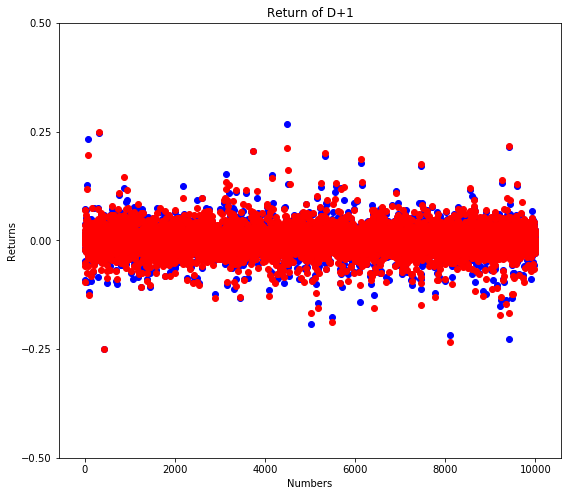

In [215]:
xnum = range(1,10001)
f, ax = plt.subplots(figsize=(9, 8))
o1 = plt.scatter(xnum,testYstep2[:,0],color='blue')
o2 = plt.scatter(xnum,test_plus_12[:,0],color='red')
plt.xlabel('Numbers')
plt.ylabel('Returns')
plt.title('Return of D+1')
yticks = np.linspace(-0.5, 0.5, 5)
ax.set_yticks(yticks)

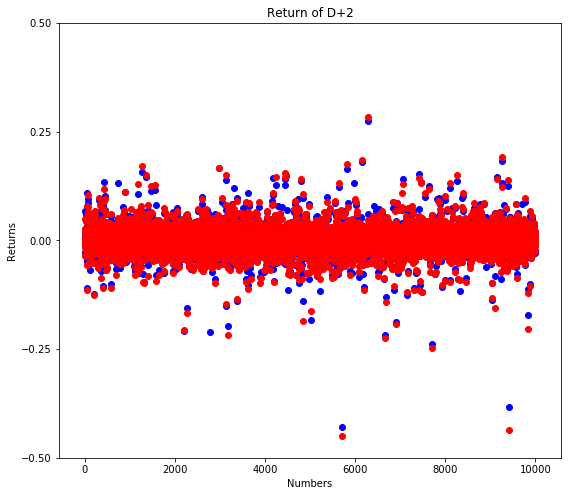

In [214]:
xnum = range(1,10001)
f, ax = plt.subplots(figsize=(9, 8))
o1 = plt.scatter(xnum,testYstep2[:,1],color='blue')
o2 = plt.scatter(xnum,test_plus_12[:,1],color='red')
plt.xlabel('Numbers')
plt.ylabel('Returns')
plt.title('Return of D+2')
yticks = np.linspace(-0.5, 0.5, 5)
ax.set_yticks(yticks)

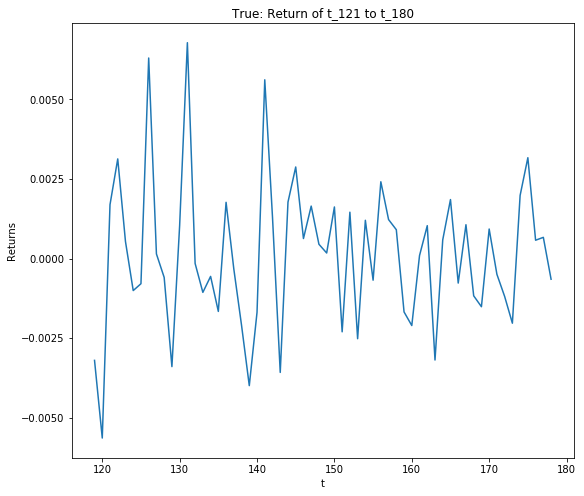

In [252]:
samplenum = np.random.choice(10)
f, ax = plt.subplots(figsize=(9, 8))
plt.plot(xr,Xtest[samplenum,119:].T)
plt.xlabel('t')
plt.ylabel('Returns')
plt.title('True: Return of t_121 to t_180')
yticks = np.linspace(-0.005, 0.005, 5)
ax.set_yticks(yticks)